# Identifying Preferred Courses by Students Using K-Means Clustering

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from joblib import dump, load

# For better plot appearance
%matplotlib inline

## 1. Load data

In [2]:
# load data 
data_mahasiswa = pd.read_csv('MHS.csv')  
data_krs = pd.read_csv('KRS.csv')  
 
data_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,pembimbing_tugas_akhir
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028.0
1,1931001,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931009,Richie Marlon,Sistem Informasi,2019,3.90,Lulus,5120028.0
3,1931083,Elvin Whang,Sistem Informasi,2019,3.68,Lulus,6200076.0
4,2031001,Robin Sunjaya,Sistem Informasi,2020,3.88,Aktif,9180074.0


In [3]:
data_krs.head()

,npm_mahasiswa,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori_matakuliah
0,1931001,ganjil,2019,1BUMA,SI00194,Agama,2,0,0,0,0,A,Agama
1,1931001,ganjil,2019,1SIMA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware
2,1931001,ganjil,2019,1VUMD,SI00192,Bahasa Inggris I,2,0,0,0,0,A,Bahasa
3,1931001,ganjil,2019,1SIMA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming
4,1931001,ganjil,2019,1SIMA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,B,Manajemen


In [4]:
# merge data_krs and data_mahasiswa using `npm_mahasiswa` as the key  
merged_data = pd.merge(data_krs, data_mahasiswa, on='npm_mahasiswa')  

# drop null data
merged_data.dropna(inplace=True)

merged_data.head()

,npm_mahasiswa,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori_matakuliah,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,pembimbing_tugas_akhir
0,1931001,ganjil,2019,1BUMA,SI00194,Agama,2,0,0,0,0,A,Agama,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
1,1931001,ganjil,2019,1SIMA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931001,ganjil,2019,1VUMD,SI00192,Bahasa Inggris I,2,0,0,0,0,A,Bahasa,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
3,1931001,ganjil,2019,1SIMA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
4,1931001,ganjil,2019,1SIMA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,B,Manajemen,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0


## 2. Choose and Prepare Features

In [5]:
# mapping `nilai`
nilai_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}  
merged_data['kode_nilai_numerik'] = merged_data['kode_nilai'].map(nilai_mapping)  

# choose relevant features for clustering  
features = merged_data[['total_hadir', 'sks_matakuliah', 'kode_nilai_numerik']]  

features.head()

,total_hadir,sks_matakuliah,kode_nilai_numerik
0,0,2,4
1,0,3,4
2,0,2,4
3,0,1,4
4,0,3,3


## 4. Data Normalization

In [6]:
# normalize data using StandardScaler  
scaler = StandardScaler()  
features_scaled = scaler.fit_transform(features)  

pd.DataFrame(features_scaled, columns=features.columns).head()

,total_hadir,sks_matakuliah,kode_nilai_numerik
0,-1.598503,-0.830729,0.455815
1,-1.598503,0.337571,0.455815
2,-1.598503,-0.830729,0.455815
3,-1.598503,-1.999030,0.455815
4,-1.598503,0.337571,-0.839900


In [7]:
# calculate Silhouette Score for each k values  
silhouette_scores = []  

 # test using 2 - 9 
k_values = range(2, 10)

for k in k_values:  
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)  
    kmeans.fit(features_scaled)  
    score = silhouette_score(features_scaled, kmeans.labels_)  
    silhouette_scores.append(score)

In [8]:
for score in silhouette_scores:
    print(f'Silhouette Score for {silhouette_scores.index(score)+2} clusters: {score}')

Silhouette Score for 2 clusters: 0.5009017353593365
Silhouette Score for 3 clusters: 0.5538223700680597
Silhouette Score for 4 clusters: 0.6233384777637214
Silhouette Score for 5 clusters: 0.6454950662616914
Silhouette Score for 6 clusters: 0.6744832147262235
Silhouette Score for 7 clusters: 0.7007805380210644
Silhouette Score for 8 clusters: 0.7283703071409894
Silhouette Score for 9 clusters: 0.7571450496614839


## 6. Visualize Silhouette Scores

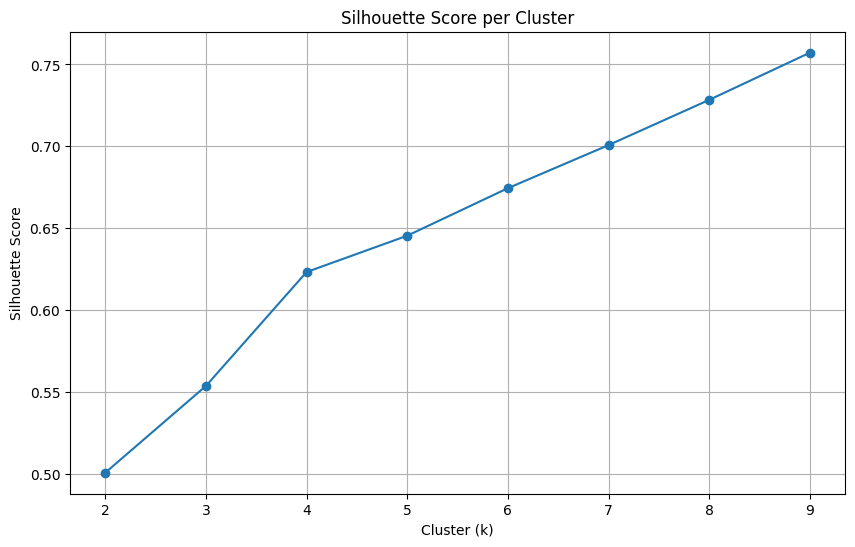

In [9]:
# Plot Silhouette Scores  
plt.figure(figsize=(10, 6))  
plt.plot(k_values, silhouette_scores, marker='o')  
plt.title('Silhouette Score per Cluster')  
plt.xlabel('Cluster (k)')  
plt.ylabel('Silhouette Score')  
plt.xticks(k_values)  
plt.grid()  
plt.show()

## 7. K-Means Model Training

In [10]:
# determine the best cluster  
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]  
print(f'Best Cluster: {best_k}')  

# train K-Means model using the best cluster
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', n_init=10, random_state=42)  
kmeans_final.fit(features_scaled)

Best Cluster: 9


KMeans(n_clusters=9, n_init=10, random_state=42)

In [12]:
# save the model
dump(kmeans_final, 'kmeans_model_final.joblib') 

['kmeans_model_final.joblib']

## 8. Adding Cluster Labels to Data

In [13]:
# add the cluster label
merged_data['cluster'] = kmeans_final.labels_  

merged_data[['npm_mahasiswa', 'kode_matkul', 'cluster']].head()

,npm_mahasiswa,kode_matkul,cluster
0,1931001,SI00194,8
1,1931001,SI00153,2
2,1931001,SI00192,8
3,1931001,SIL0085,8
4,1931001,SI00151,7


## 9. Analyze the Most Popular Course per Cluster

In [15]:
# calculate the most popular course per cluster  
popular_matkul = merged_data.groupby('cluster')['kode_matkul'].agg(lambda x: x.mode().iloc[0])  
print('Popular Course per Cluster:')  
print(popular_matkul)

Popular Course per Cluster:
cluster
0    SIL0124
1    SI00224
2    SI00153
3    SI00260
4    SI00260
5    SI00230
6    SI00196
7    SI00192
8    SI00194
Name: kode_matkul, dtype: object


## 10. Visualize Clustering Result

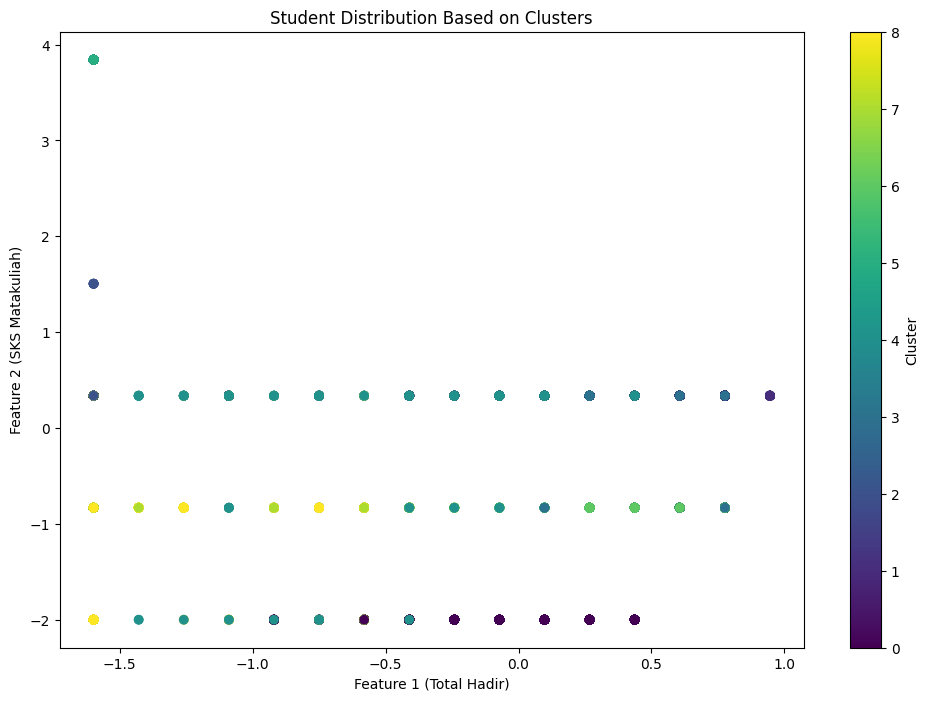

In [16]:
# clustering result plot  
plt.figure(figsize=(12, 8))  
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_final.labels_, cmap='viridis')  
plt.title('Student Distribution Based on Clusters')  
plt.xlabel('Feature 1 (Total Hadir)')  
plt.ylabel('Feature 2 (SKS Matakuliah)')  
plt.colorbar(label='Cluster')  
plt.show()

# Use the Model

In [27]:
# load the model
kmeans_model = load('kmeans_model_final.joblib')  

def get_favorite_courses(npm, merged_data):  
    # get the student data using npm
    student_data = merged_data[merged_data['npm_mahasiswa'] == npm]  
    
    if student_data.empty:  
        return f"Data for NPM {npm} not found."  
    
    # take the appropriate features to make predictions
    features = student_data[['total_hadir', 'sks_matakuliah', 'kode_nilai_numerik']]  
    features_scaled = scaler.transform(features)

    # predict the cluster 
    cluster = kmeans_model.predict(features_scaled)  

    # make sure the 'cluster' column is present in merged_data 
    favorite_courses = merged_data[(merged_data['cluster'] == cluster[0]) & (merged_data['npm_mahasiswa'] == npm)]

    result =favorite_courses[['nama_mahasiswa', 'kode_matkul', 'nama_matkul',]].drop_duplicates()  

    return result

In [28]:
npm_mahasiswa = 2231141

favorite_course = get_favorite_courses(npm_mahasiswa, merged_data)
print(favorite_course)

      nama_mahasiswa kode_matkul        nama_matkul
19593   Bryan Kenedy     SI00194              Agama
19594   Bryan Kenedy     SI00192   Bahasa Inggris I
23436   Bryan Kenedy     SI00197  Bahasa Inggris II
